<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .prompt{
        display: None;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  
</style>
<script>
    MathJax.Hub.Config({
                        TeX: {
                           extensions: ["AMSmath.js"]
                           },
                tex2jax: {
                    inlineMath: [ ['$','$'], ["\\(","\\)"] ],
                    displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
                },
                displayAlign: 'center', // Change this to 'center' to center equations.
                "HTML-CSS": {
                    styles: {'.MathJax_Display': {"margin": 4}}
                }
        });
</script>

# Lifelines examples
##### Gehan Survival Dataset

The data show the length of remission in weeks for two groups of leukemia patients, treated and control, and were analyzed by Cox in his original proportional hazards paper. The data are available in a file containing three columns:

- Treatment: coded Treated (drug) or Control (placebo),
- Time: weeks of remission,
- Failure: coded 1 if a failure (relapse), 0 if censored

Thus, the third and fourth observations, 6 and 6+, corresponding to a death and a censored observation at six weeks, are coded 6, 1 and 6, 0, respectively.

In [3]:
from lifelines.estimation import KaplanMeierFitter, NelsonAalenFitter
import pandas as pd
import numpy as np
%pylab inline
figsize(12.5,6)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
data = pd.read_csv('gehan.dat', sep="\s{1,3}", header=None)

/Users/camerondavidson-pilon/.virtualenvs/data/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [5]:
data.tail()

,0,1,2
37,1,12,1
38,1,15,1
39,1,17,1
40,1,22,1
41,1,23,1


In [14]:
data = data.dropna()
print data.head()

   0  1  2
0  2  6  1
1  2  6  1
2  2  6  1
3  2  6  0
4  2  7  1


In [15]:
treatment = data[0] == 2

In [19]:
T = data[1]
E = data[2]
t = np.linspace(0,40,150)

(0, 1.05)

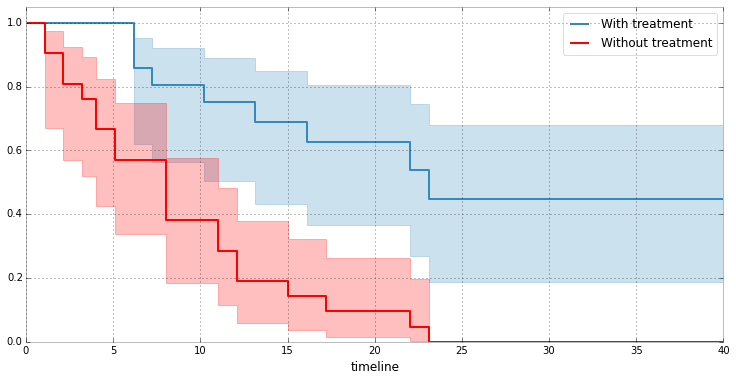

In [20]:
kmf = KaplanMeierFitter()
kmf.fit(T[treatment], timeline=t, event_observed=E[treatment], label='With treatment')
ax = kmf.plot()

kmf.fit(T[~treatment], timeline=t, event_observed=E[~treatment], label="Without treatment")
kmf.plot(ax=ax, c="r")
ylim(0,1.05)

### Hazards, too

In [21]:
naf = NelsonAalenFitter()

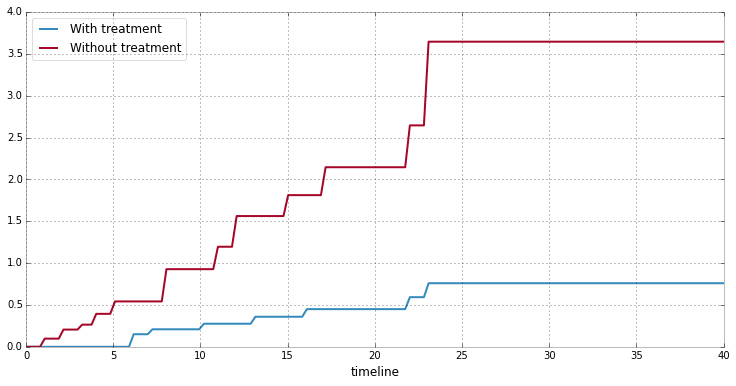

In [23]:
naf.fit(T[treatment],timeline=t, event_observed=E[treatment], label="With treatment")
ax = naf.cumulative_hazard_.plot()
naf.fit(T[~treatment], timeline=t, event_observed=E[~treatment], label="Without treatment")
ax = naf.cumulative_hazard_.plot(ax=ax)

### Try a more complicated model?

In [26]:
from lifelines import AalenAdditiveFitter

In [34]:
aaf = AalenAdditiveFitter()
aaf.fit(data, duration_col=1, event_col=2, timeline=t)

 [-----------------100%-----------------] 30 of 30 complete in 0.0 sec


<lifelines.AalenAdditiveFitter: fitted with 42 observations, 12 censored>

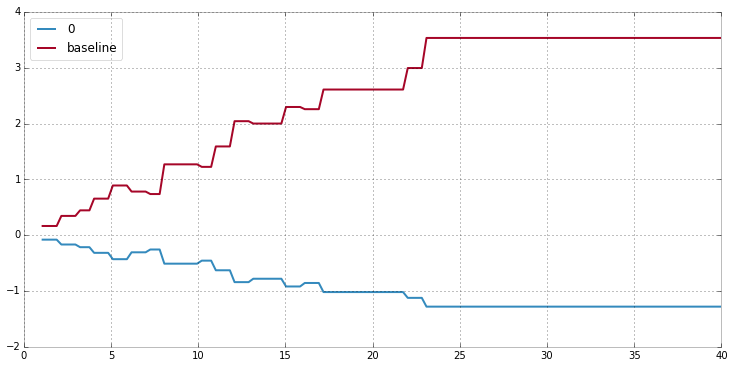

In [35]:
aaf.cumulative_hazards_.plot()